<a href="https://colab.research.google.com/github/gencross/CollatzGroup3/blob/main/Collatz_Conjecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collatz Conjecture
##Group 3
###Edward Hayden, Miles Mitchell, Kevin Nguyen, Tatiana Godinez

# Introduction
The 3n+1 problem is simple enough for an elementary schooler to grasp. Pick a number. If it's even, divide it by 2. If it's odd, multiply it by 3, then add 1. Then, repeat the process. If you reach 1, stop. For example, 5 -> 16 -> 8 -> 4 -> 2 -> 1. The Collatz conjecture states that every positive integer will reach 1 after only finitely many steps. This conjecture has yet to be proven or disproven. In this notebook, we will explore some of the questions and conundrums surrounding this problem.

In [ ]:
import math
import matplotlib.pyplot as plt

##**Functions**
###Here are the functions we use in our exploration of the Collatz conjecture



In [ ]:
def collatz_steps(n,printit): 

  '''
  
  Returns the number of steps it takes for the Collatz
  map to reach the limit cycle.
  Prints this number if printit == true.

  args: integer n, boolean printit

  return: number of steps it takes to reach the limit cycle

  '''   
  steps = 0                     
  while n != 4:                  
    steps += 1
    if n%2 == 0:
      n = n/2
    else:  
      n = 3*n +1
  if printit:
    print("It took {} steps to reach our limit cycle".format(steps))
  return steps  

In [ ]:
def collatz_plot(n):
  '''
  
  This function creates a scatter plot of the bahavior of the Collatz map 
  applied to an integer n.

  args: integer n

  return: scatter plot

  '''
  steps = 0
  nlist = list()
  while n != 4:
    nlist.append(n)
    steps += 1
    if n%2 == 0:
      n = n/2
    else:  
      n = 3*n +1
  allsteps = range(steps)      
  plt.scatter(allsteps,nlist)    
  plt.show()  

In [ ]:
def collatz_show(bound):

  '''

  This function creates a bar graph of the time it takes for each integer up to 
  n to reach the limit cycle under the Collatz map

  args: integer n

  return: bar plot of return times in [1,n-1]

  '''

  stepslist = list()
  for n in range(bound):
    stepslist.append(collatz_steps(n+1,0))
  plt.bar(range(bound),stepslist) 
  plt.show() 
  

In [ ]:
collatz_steps(500,1)

It took 108 steps to reach our limit cycle


108

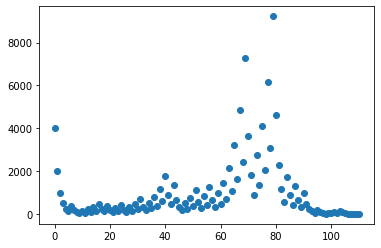

In [ ]:
collatz_plot(4000)

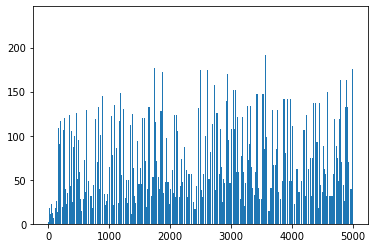

In [ ]:
collatz_show(5000)

In [ ]:
def collatz_verbose(n):
  '''
  Prints the orbit of n
  
  '''
  while n != 1:
    print(n)
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
  return

In [ ]:
def collatz_iterations(n):
  '''

  Return how many iterations it takes for
  n to go to 1
  
  '''
  iterations = 0
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
      iterations += 1
  return iterations

In [ ]:
def collatz_check(n):
  '''
  Returns True if n passes
  the Collatz conjecture
  '''
  while n-1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
  return True

In [ ]:
for i in range(2,10**6):
  if collatz_check(i) != True:
    print("Fields Medal!!!", i)
print("Check complete.")  

Check complete.


In [ ]:
def find_max_iter(n):
  '''
  Checks for the number with the longest orbit
  up to n. Returns a tuple. The first value is
  the number, the second value is the number of 
  iterations.
  
  '''
  max_iter = 0
  max_iter_n = 0
  for i in range(2,n+1):
    i_iter = collatz_iterations(i)
    if i_iter > max_iter:
      max_iter = i_iter
      max_iter_n = i
  return max_iter_n, max_iter

# Verifying the Conjecture
Below is a function that verifies the conjecture up to 10 million. We check every odd number from 3 to a 10 million minus 1. We don't check the even numbers for the following reason. Any even number can be written as 2k, where k is any integer. So after the first step of the 3n+1 process, 2k becomes k. If k is odd, we've already checked it, so no need to continue. If k is even, the half of k will either be odd or even, et cetera. Only checking odd numbers speeds up the process significantly. Furthermore, we don't check if a number goes all the way to 1, we only check if it becomes less than where it started. Since we check numbers sequentially, we've already checked all of the numbers less than the one that we're currently checking.

In [3]:
def collatz_check(n): #check all numbers less than or equal to n
  for i in range(3,n+1,2): #only check odd numbers
    c = i # i will remain constant, c will change
    while c >= i:
      if c % 2 == 0:
        c //= 2
      if c % 2 == 1:
        c = (3 * c + 1) // 2 # we can do two steps at once since 3c+1 is always even
  print("Verified up to {}".format(n))

In [4]:
collatz_check(10**7)

Verified up to 10000000


# Dropping Time
The "dropping time", σ(n), of an integer n is defined as the number of 3n+1 iterations that n undergoes before it becomes less than where it started. For example, σ(5)=3, since 5 goes to 16 goes to 8 goes to 4, which is less than 5. Every number that we tested has a finite dropping time, since every number that we tested eventually reached 1. The dropping time is significant in testing new numbers if you're testing numbers sequentially. Once a number n drops below where it started, it will definitely reach 1 because all numbers less than n have already been shown to reach 1. Below, you can see the dropping time function that we created.

In [ ]:
def sigma(n):
  '''
  Finds and returns the "dropping time" of n.
  This is the number of 3n+1 loops that it takes
  for n to become less than where it started.
  '''
  i = n # i will be the variable that changes, n will stay static
  loops = 0 # track the dropping time here
  while i >= n: # stop when i < n
    if i % 2 == 0:
      i //= 2
      loops += 1
    else:
      i = (3 * i + 1) // 2
      loops += 2 # We can combine 2 steps into one here since 3i+1 is always even
  return loops

At first glance, σ(n) doesn't depend on the size of n. See below, the dropping time of prime numbers ranging from 1 to 10 digits.

In [ ]:
[sigma(7),
sigma(31),
sigma(127),
sigma(8191),
sigma(97259),
sigma(524287),
sigma(9375739),
sigma(86028121),
sigma(633910099),
sigma(2147483647)]

[11, 91, 24, 70, 8, 91, 21, 3, 6, 187]

The 10 digit number has the largest dropping time, but 31 is tied for second place. So, the following function was created to find which numbers have a bigger dropping time than any previous numbers.

In [ ]:
def best_sigmas(n):
  '''
  Creates and returns a list all positive ints
  less than or equal to n whose dropping time
  is greater than the dropping times of all
  smaller positive ints. Also returns the dropping
  times. Output format is (n,sigma(n)).
  '''
  int_list = [(2,1)] #σ(1) is undefined, so we start checking at 2
  for i in range(3,n+1,2): # we only check odd numbers since σ(2n) = 1 for any n
    sig_i = sigma(i) # save this as a variable so we don't have to run it twice
    if sig_i > int_list[-1][1]:
      int_list.append((i,sig_i))
  return int_list

In [ ]:
best_sigmas(10**7)

[(2, 1),
 (3, 6),
 (7, 11),
 (27, 96),
 (703, 132),
 (10087, 171),
 (35655, 220),
 (270271, 267),
 (362343, 269),
 (381727, 282),
 (626331, 287),
 (1027431, 298),
 (1126015, 365),
 (8088063, 401)]

The output is formatted as `(n,σ(n))`. With this list, we can see that σ(n) only increases 13 times when n goes from 2 to 10 million. A logical next step would be finding what the most common dropping time is. A sensible guess is 1, since all even numbers have a dropping time of 1. Let's check.

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(2,10**7): # we check up 10**7 because checking higher takes too long
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

5.235936047187209 is the mean.
1 is the mode.


As predicted, 1 is the mode. But, the mean is 5.236, a number that seems quite random. What happens when we only consider odd numbers?

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(3,10**7,2): # only odd numbers this time
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

9.471872094374419 is the mean.
3 is the mode.


When we only look at odd numbers, the mode is 3. The mean is about twice as big, which makes sense. Odd numbers are of the form 2n+1, so what happens if we look at numbers of the form 4n+1?

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(5,10**7,4): # we start with 4 because σ(1) is undefined
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

3 is the mean.
3 is the mode.


This time, 3 is the mean as well! What does this list look like?

In [ ]:
print(sigma_list[10**5:10**5+200])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


It's too big to show here because of the length of the list, but it's all 3s. So, it looks like σ(4n+1) = 3 for all n! In fact, this can be proven.<br />
`4n+1 is odd, so do 3(4n+1)+1`<br />
`12n+4 is even, so do (12n+4)/2`<br />
`6n+2 is even, so do (6n+2)/2`<br />
`3n+1 < 4n+1 so we're done.`<br />
This shows that any number of the form 4n+1 has a dropping time of 3! Are there other formulas that can give us numbers with a fixed dropping time? To answer this question, here is a function which will calculate σ(n) for all n=ai+b, where i is a positive integer. We stop the calculations at n=10**6.

In [ ]:
def sigma_b_mod_a(a,b):
  '''
  Returns a list of all of the sigmas
  for integers congruent to b mod a
  up to 10**6
  '''
  sigma_list = []
  for i in range(b,10**6,a):
    sigma_list.append(sigma(i))
  return sigma_list

We need a way to parse this data. The last function returns a list with too many elements to analyze by hand, so we'll look at its mean instead. The below function will help us. 

In [ ]:
from statistics import mean
def average_sigma(a):
  '''
  Returns a list of tuples. Call the first entry i. Then the
  second entry is the mean of all σ(an+i) where an+i is 
  less than 10**6.
  '''
  average_sigma_list = []
  for i in range(1,301):
    k = mean(sigma_b_mod_a(i,a))
    average_sigma_list.append((i,k))
  return average_sigma_list

In [ ]:
average_sigma(3)[:50]

[(1, 5.226273678821037),
 (2, 9.45253890507781),
 (3, 5.2280362280362285),
 (4, 15.905052),
 (5, 5.223985),
 (6, 9.456047087905825),
 (7, 5.221417221417221),
 (8, 10.428632),
 (9, 5.2475002475002475),
 (10, 9.44797),
 (11, 5.24995324995325),
 (12, 15.91201670386637),
 (13, 5.215709215709215),
 (14, 9.44277534334794),
 (15, 5.217978910105449),
 (16, 6),
 (17, 5.2078233374133),
 (18, 9.494924040607675),
 (19, 5.208922328621371),
 (20, 15.89594),
 (21, 5.208992208992209),
 (22, 9.499813001869981),
 (23, 5.221808229260103),
 (24, 10.436340509275926),
 (25, 5.228625),
 (26, 9.431308824294108),
 (27, 5.272943272943273),
 (28, 15.885370292594148),
 (29, 5.23571035002755),
 (30, 9.435831283374332),
 (31, 5.237181474362949),
 (32, 6),
 (33, 5.276408276408277),
 (34, 9.4156466748266),
 (35, 5.206810863782724),
 (36, 15.98984808121535),
 (37, 5.192844192844193),
 (38, 9.417844657242743),
 (39, 5.209118209118209),
 (40, 10.45516),
 (41, 5.221885121561232),
 (42, 9.417807643847123),
 (43, 5.2363261

It looks like σ(16n+3) = 6! This can be proven in the same way that we proved that σ(4n+1) = 3.<br />
`16n+3 is odd, so do 3(16n+3)+1`<br />
`48n+10 is even, so do (48n+10)/2`<br />
`24n+5 is odd, so do 3(24n+5)+1`<br />
`72n+16 is even, so do (72n+16)/2`<br />
`36n+8 is even, so do (36n+8)/2`<br />
`18n+4 is even, so do (18n+4)/2`<br />
`9n+2 < 16n+3 so we're done.`<br />
Here are all of the numbers that we found with a fixed dropping time:<br />
σ(4n + 1) = 3<br />
σ(16n + 3) = 6<br />
σ(32n + 11) = 8<br />
σ(32n + 23) = 8<br />
σ(128n + 15) = 11<br />
They can all be proven in the same manner as shown for the first two. The calculations are ommitted because they are tedious and uninteresting, but [here is a photo](https://raw.githubusercontent.com/gencross/CollatzGroup3/main/IMG_20210208_135505416.jpg) for those curious. At first, it looked like a pattern might be forming. The first four entries are all of the form 2**k + prime, but then we have 128n + 15, and 15 is composite. After running average_sigma(a) for values of a up to 50, we didn't find any other a and b such that σ(an+b) is fixed. 

To finish off this section, here are some very cool graphs that show how σ(n) changes with respect to n.

In [ ]:
import matplotlib.pyplot as plt
def line_plot(l):
  '''
  make a line plot from the entries of l
  '''
  index = []
  data = []
  for i in l:
    index.append(i[0])
    data.append(i[1])
  plt.plot(index,data)
  plt.xlabel("a")
  plt.ylim(bottom=0)


In the following cells, we fix b, then plot the mean of σ(an+b) for all an+b less than 10**6. This shows how σ can be almost sinusoidal for some choices of b.

(0.0, 16.542927931652553)

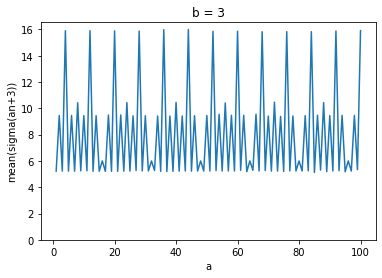

In [ ]:
line_plot(average_sigma(3)[:100])
plt.title("b = 3")
plt.ylabel("mean(sigma(an+3))")

Text(0, 0.5, 'mean(sigma(an+11))')

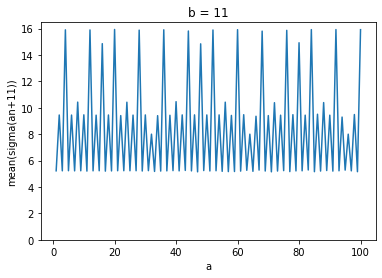

In [ ]:
line_plot(average_sigma(11)[:100])
plt.title("b = 11")
plt.ylabel("mean(sigma(an+11))")

Text(0, 0.5, 'mean(sigma(an+15))')

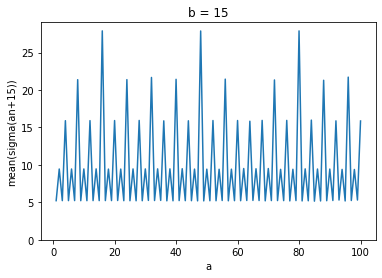

In [ ]:
line_plot(average_sigma(15)[:100])
plt.title("b = 15")
plt.ylabel("mean(sigma(an+15))")

Text(0, 0.5, 'mean(sigma(an+23))')

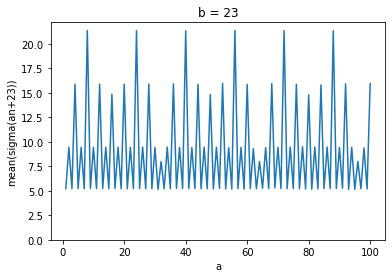

In [ ]:
line_plot(average_sigma(23)[:100])
plt.title("b = 23")
plt.ylabel("mean(sigma(an+23))")

However, not all choices in b result in a graph with such a nice periodicity.

Text(0, 0.5, 'mean(sigma(an+17))')

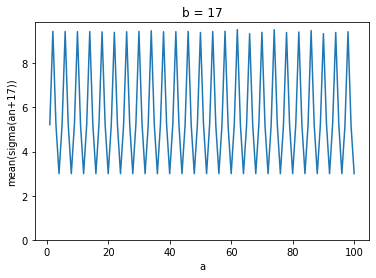

In [ ]:
line_plot(average_sigma(17)[:100])
plt.title("b = 17")
plt.ylabel("mean(sigma(an+17))")

Text(0, 0.5, 'mean(sigma(an+33))')

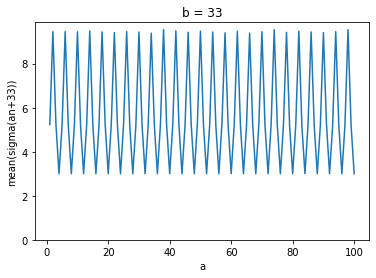

In [ ]:
line_plot(average_sigma(33)[:100])
plt.title("b = 33")
plt.ylabel("mean(sigma(an+33))")

It's important to note that the peaks and valleys are not all the same, they vary slightly.

Finding a pattern that shows that every number must have a finite dropping time is one way that the Collatz conjecture could be proven. But, after some exploration, we were unable to find one.